<a href="https://colab.research.google.com/github/Mohan-Akash/assignment/blob/main/218x1a0569_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle


In [2]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [3]:
!kaggle datasets download -d hellbuoy/car-price-prediction


Dataset URL: https://www.kaggle.com/datasets/hellbuoy/car-price-prediction
License(s): unknown
  0% 0.00/18.1k [00:00<?, ?B/s]
100% 18.1k/18.1k [00:00<00:00, 20.4MB/s]


In [4]:
!unzip /content/car-price-prediction.zip

Archive:  /content/car-price-prediction.zip
  inflating: CarPrice_Assignment.csv  
  inflating: Data Dictionary - carprices.xlsx  


**load dataset and check dataset size and info**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
df.shape

(205, 26)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

**Null values checking and** **treatment** **and Descriptive statistics**

In [10]:
df.isnull().sum()


,0
car_ID,0
symboling,0
CarName,0
fueltype,0
aspiration,0
doornumber,0
carbody,0
drivewheel,0
enginelocation,0
wheelbase,0


In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [13]:
df['doornumber'].unique()

array(['two', 'four'], dtype=object)

In [14]:
df['enginelocation'].unique()

array(['front', 'rear'], dtype=object)

In [24]:
df['enginesize'].unique()

array([130, 152, 109, 136, 131, 108, 164, 209,  61,  90,  98, 122, 156,
        92,  79, 110, 111, 119, 258, 326,  91,  70,  80, 140, 134, 183,
       234, 308, 304,  97, 103, 120, 181, 151, 194, 203, 132, 121, 146,
       171, 161, 141, 173, 145])

In [15]:
df['fueltype'].value_counts()

,count
fueltype,
gas,185
diesel,20


**Outlier checking and treatment**

<Axes: ylabel='horsepower'>

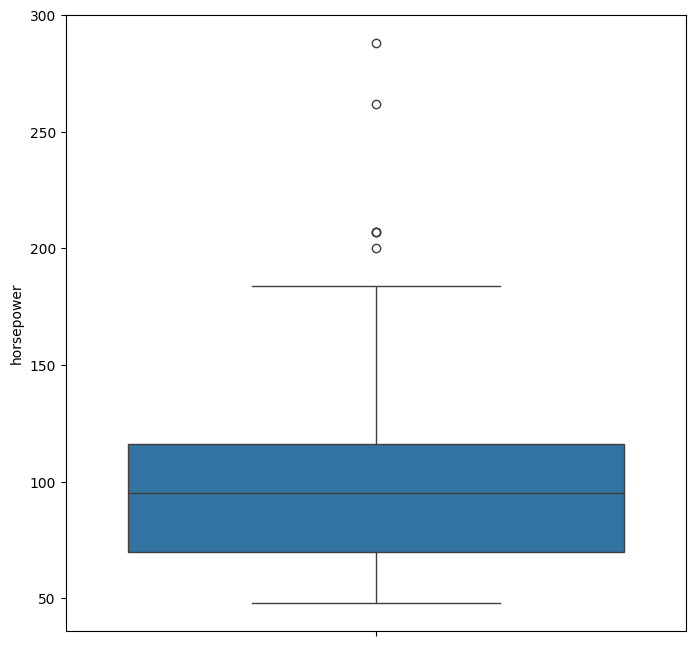

In [51]:
sns.boxplot(df.horsepower)

In [52]:
Q3 = df.horsepower.quantile(0.75)
Q1 = df.horsepower.quantile(0.25)

In [53]:
Q3

116.0

In [54]:
Q1

70.0

In [55]:
IQR = Q3-Q1
IQR

46.0

In [56]:
Upper_limit = Q3+1.5*IQR
Upper_limit

185.0

In [59]:
df['horsepower']=np.where(df['horsepower']>Upper_limit,185.0,df['horsepower'])

<Axes: ylabel='horsepower'>

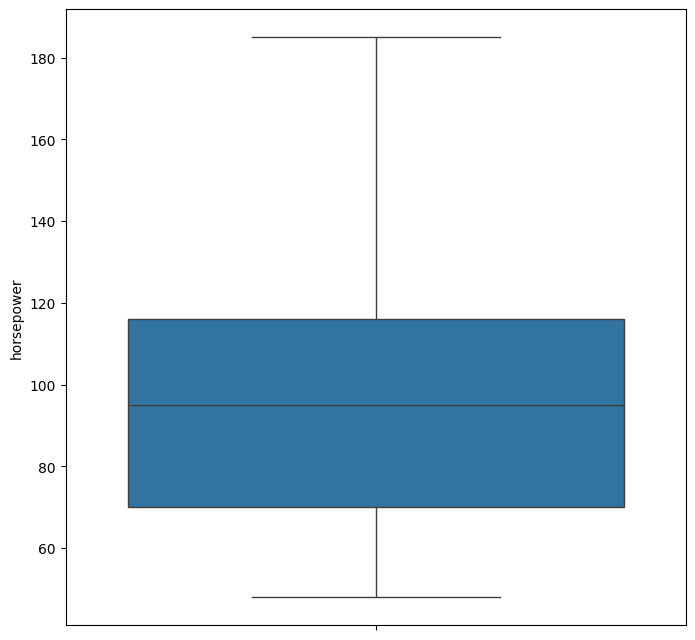

In [60]:
sns.boxplot(df.horsepower)

**Visualizations**

*Univariate Analysis*

<ipython-input-61-fe36dc2a0d7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.horsepower)


<Axes: xlabel='horsepower', ylabel='Density'>

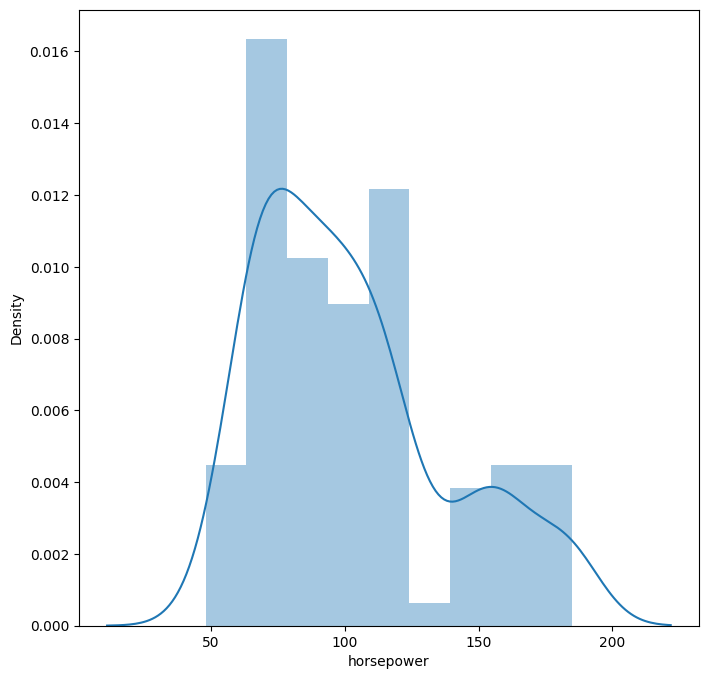

In [61]:
sns.distplot(df.horsepower)

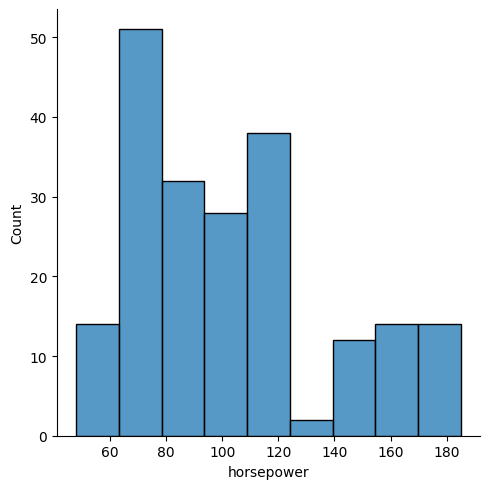

In [62]:
sns.displot(df.horsepower)

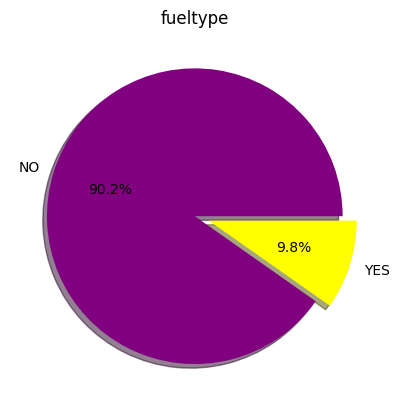

In [19]:
plt.pie(df['fueltype'].value_counts(),[0,0.1],labels = ['NO','YES'], autopct = '%1.1f%%',colors=['purple','yellow'],shadow = True)
plt.title('fueltype')
plt.show()


In [20]:
from matplotlib import rcParams

rcParams['figure.figsize']=8,8

<ipython-input-22-b0c4a1bba869>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x =df['doornumber'].value_counts().index, y =df['doornumber'].value_counts(),palette ='husl')


<Axes: xlabel='doornumber', ylabel='count'>

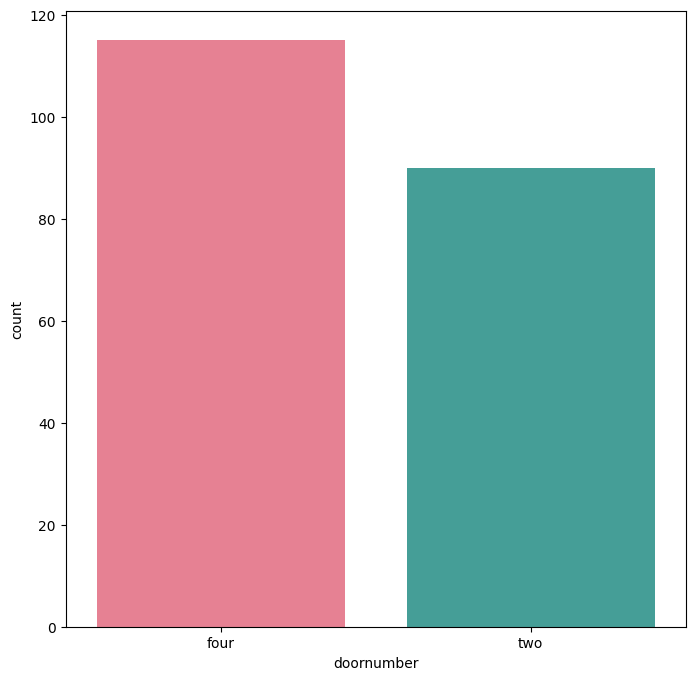

In [22]:
sns.barplot(x =df['doornumber'].value_counts().index, y =df['doornumber'].value_counts(),palette ='husl')

*Bivartiate* Analysis

<ipython-input-23-4b0878b982d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x = df['fueltype'],y = df['doornumber'], palette = 'Set1', data =df)


<Axes: xlabel='fueltype', ylabel='doornumber'>

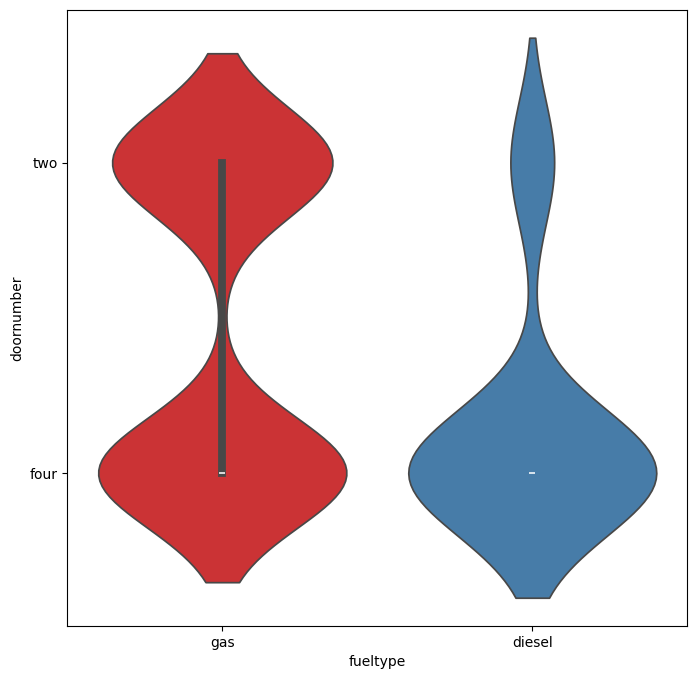

In [23]:
sns.violinplot(x = df['fueltype'],y = df['doornumber'], palette = 'Set1', data =df)

<ipython-input-25-87b81ecf35a7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x='fueltype', y = 'enginesize',kind = 'box', data=df, palette='flare')


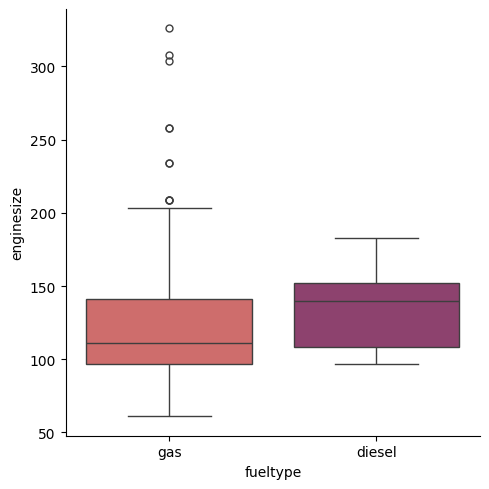

In [25]:
sns.catplot(x='fueltype', y = 'enginesize',kind = 'box', data=df, palette='flare')

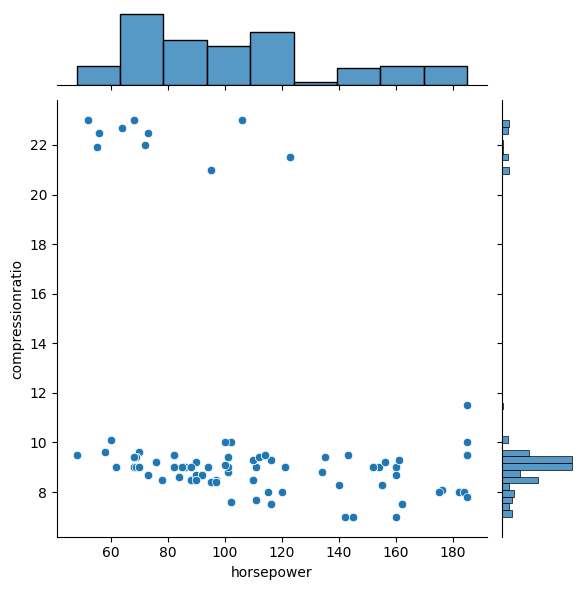

In [63]:
sns.jointplot(x='horsepower',y='compressionratio',data=df)

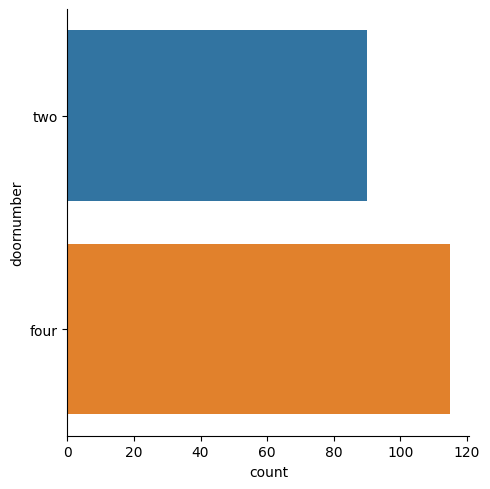

In [64]:
sns.catplot(y ='doornumber',hue='doornumber',kind = 'count',data =df)

<Axes: xlabel='enginetype', ylabel='price'>

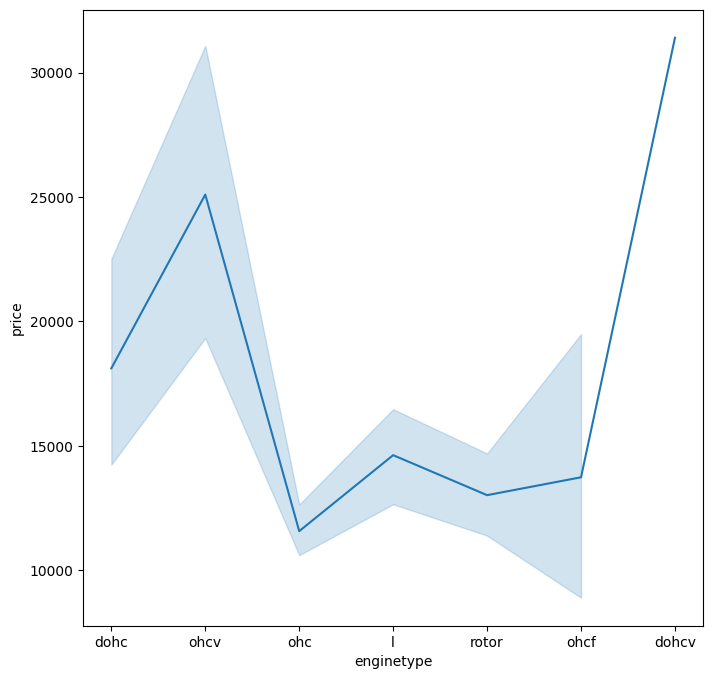

In [65]:
sns.lineplot(x=df.enginetype,y=df.price)

*.Multivariate Analysi*s

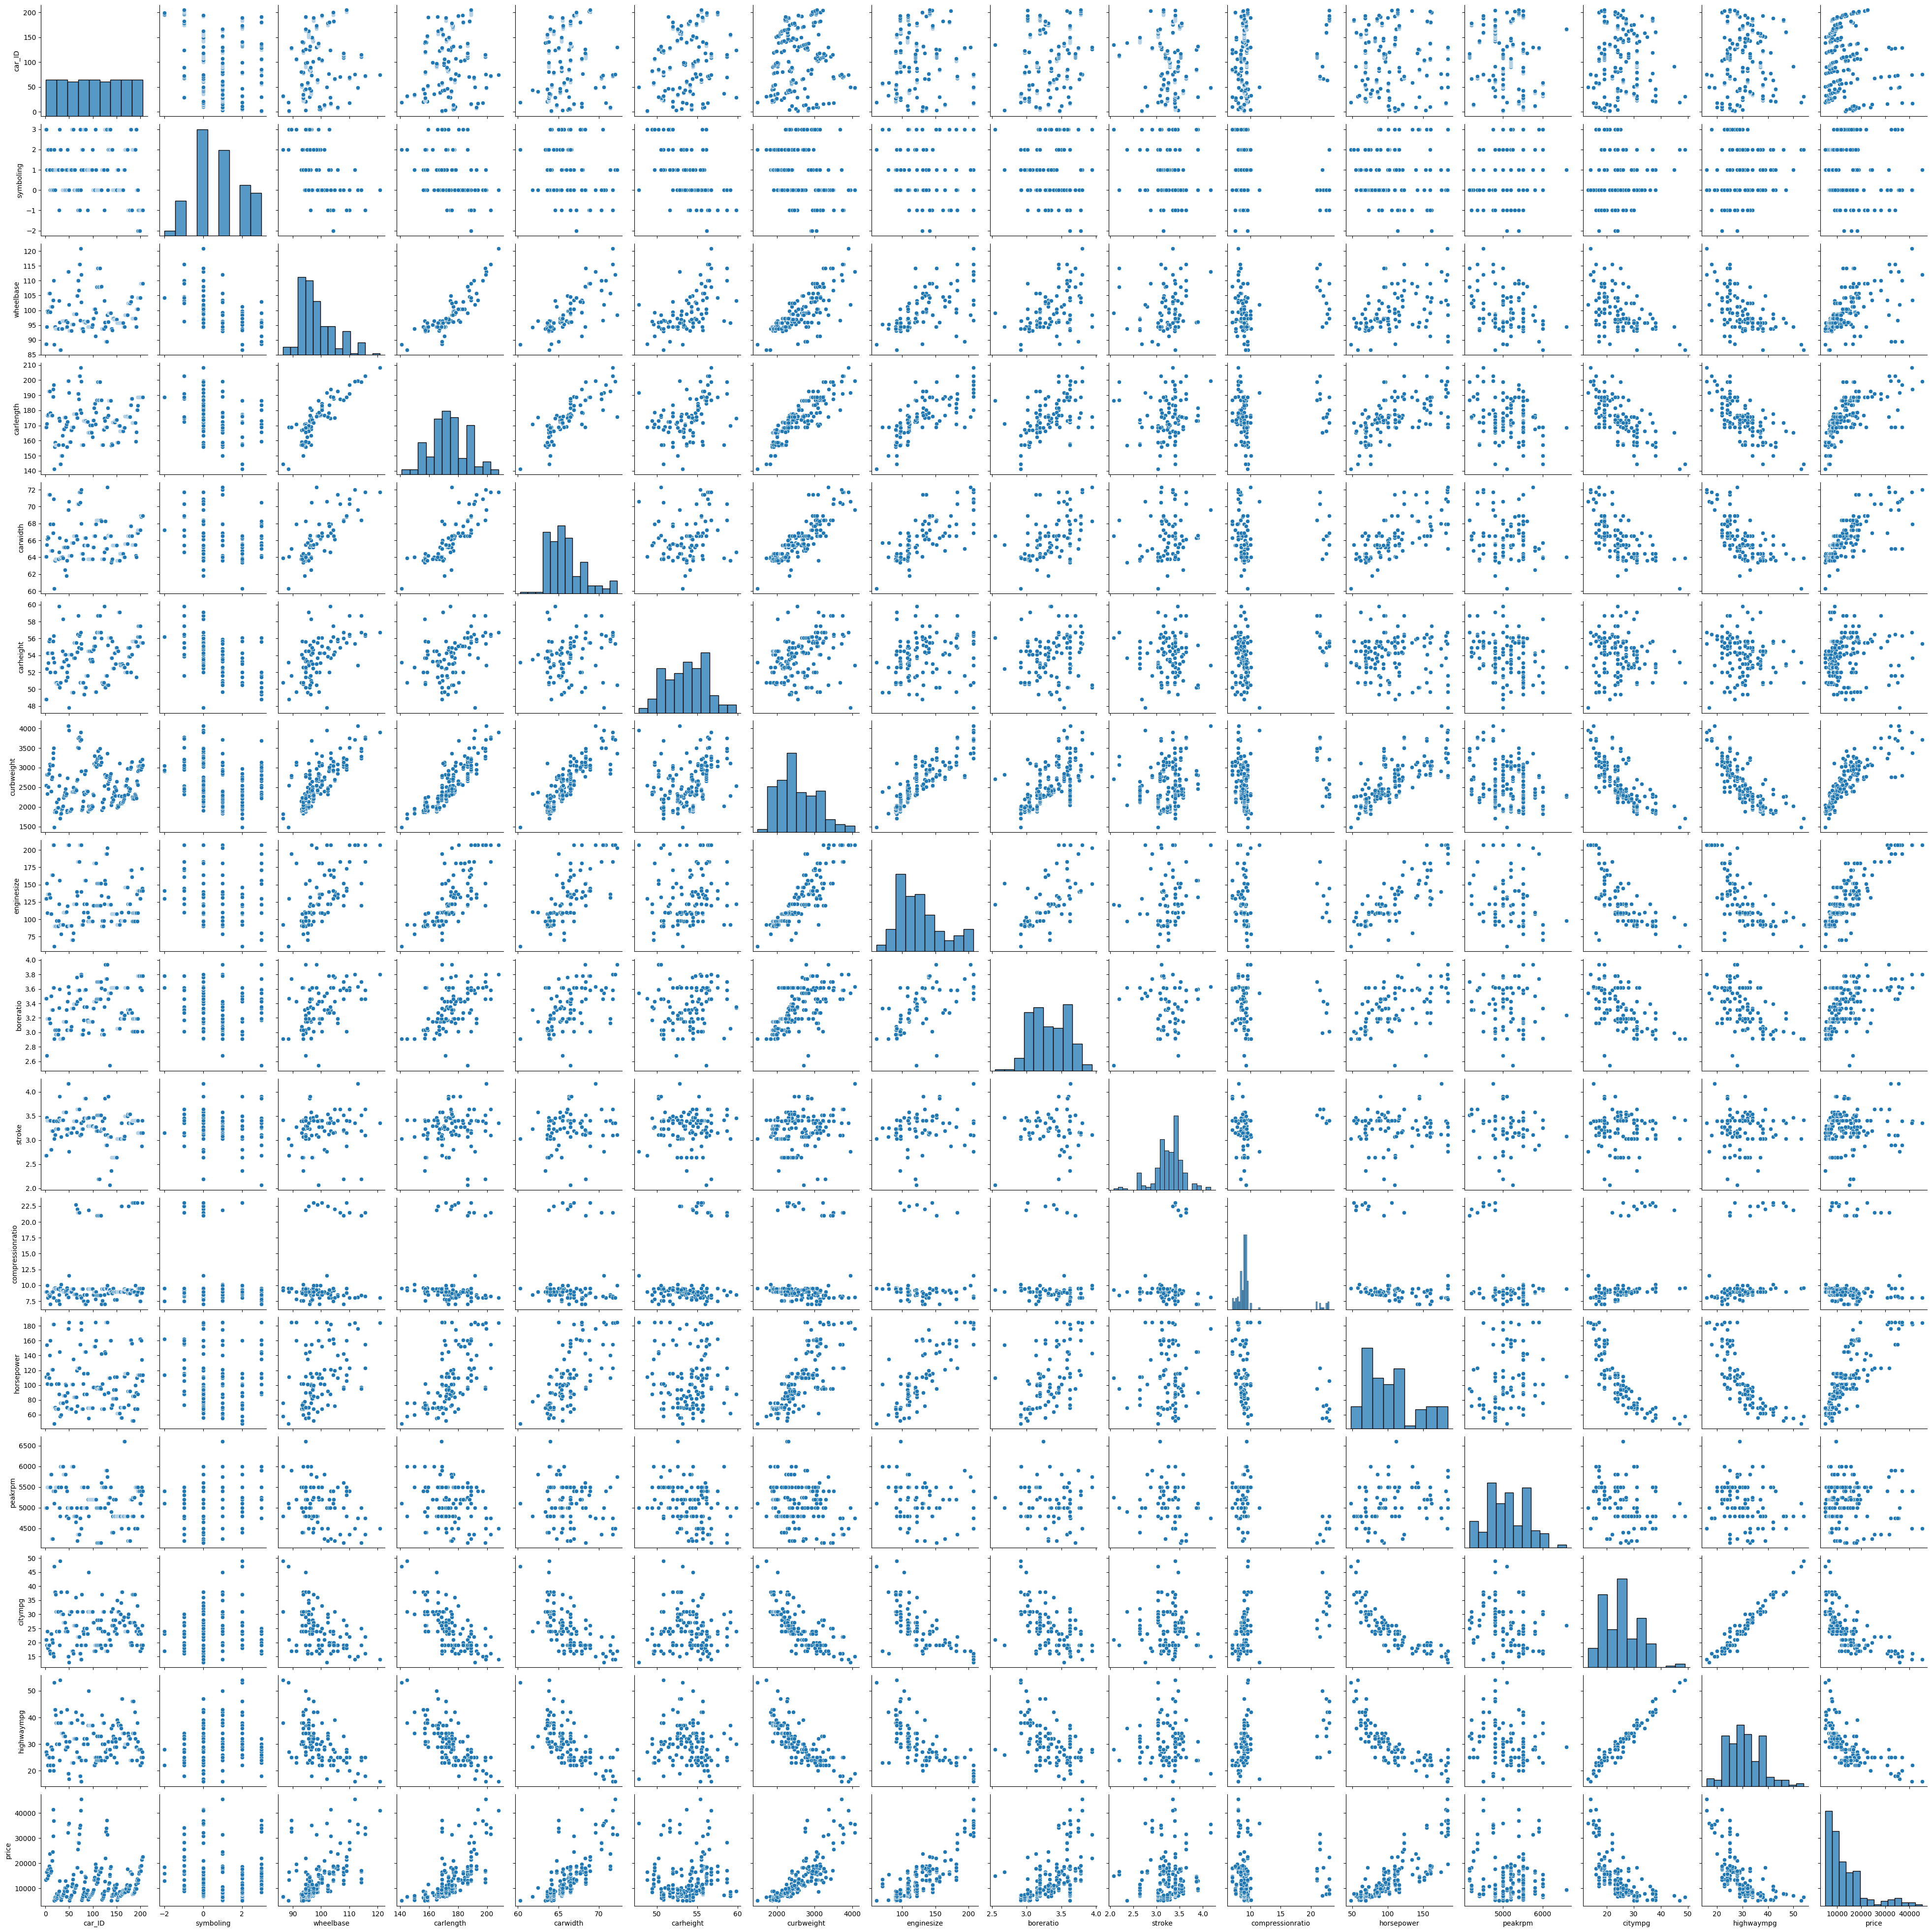

In [67]:
sns.pairplot(df)

In [68]:
numeric_columns = ['compressionratio', 'horsepower', 'price']
correlation_matrix = df[numeric_columns].corr()

In [69]:
correlation_matrix

,compressionratio,horsepower,price
compressionratio,1.000000,-0.227525,0.067984
horsepower,-0.227525,1.000000,0.809985
price,0.067984,0.809985,1.000000


<Axes: >

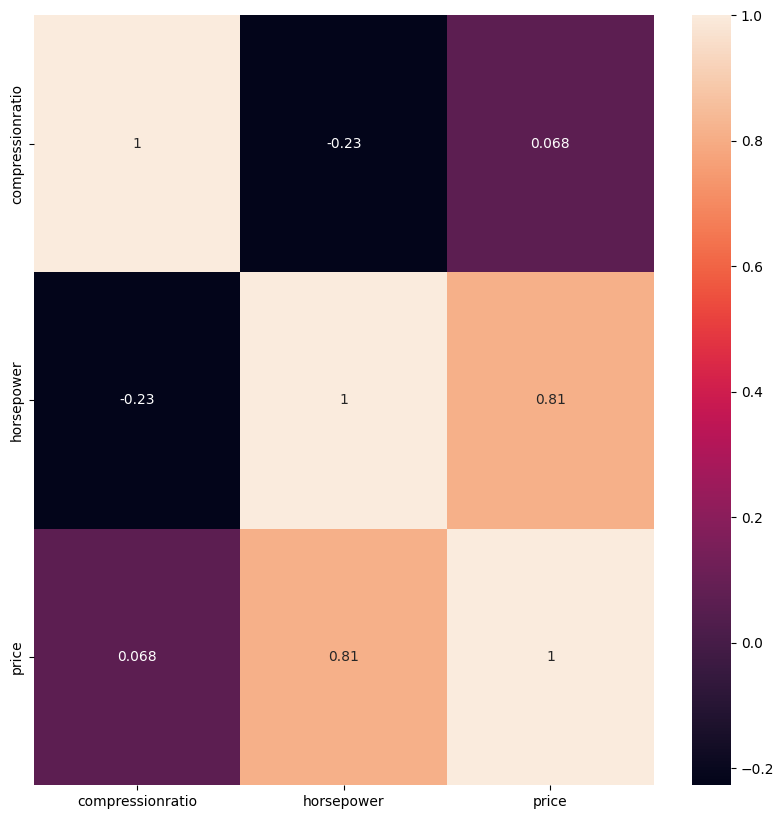

In [70]:
plt.figure(figsize =(10,10))
sns.heatmap(correlation_matrix, annot =True)

**Encoding**

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
df['CarName'] = le.fit_transform(df['CarName'])
df['fueltype'] = le.fit_transform(df['fueltype'])
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df['fuelsystem'] = le.fit_transform(df['fuelsystem'])
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000,21,27,13495.0
1,2,3,3,1,0,1,0,2,0,88.6,...,130.0,5,3.47,2.68,9.0,111.0,5000,21,27,16500.0
2,3,1,1,1,0,1,2,2,0,94.5,...,152.0,5,2.68,3.47,9.0,154.0,5000,19,26,16500.0
3,4,2,4,1,0,0,3,1,0,99.8,...,109.0,5,3.19,3.40,10.0,102.0,5500,24,30,13950.0
4,5,2,5,1,0,0,3,0,0,99.4,...,136.0,5,3.19,3.40,8.0,115.0,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,139,1,0,0,3,2,0,109.1,...,141.0,5,3.78,3.15,9.5,114.0,5400,23,28,16845.0
201,202,-1,138,1,1,0,3,2,0,109.1,...,141.0,5,3.78,3.15,8.7,160.0,5300,19,25,19045.0
202,203,-1,140,1,0,0,3,2,0,109.1,...,173.0,5,3.58,2.87,8.8,134.0,5500,18,23,21485.0
203,204,-1,142,0,1,0,3,2,0,109.1,...,145.0,3,3.01,3.40,23.0,106.0,4800,26,27,22470.0


In [74]:
df.corr()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.967077,-0.125568,0.067729,-0.190352,0.098303,0.051406,0.051483,0.129729,...,0.006263,0.204898,0.260064,-0.160824,0.150276,-0.017595,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.107095,0.194311,-0.059866,0.664073,-0.596135,-0.041671,0.212471,-0.531954,...,-0.100869,0.091163,-0.130051,-0.008735,-0.178515,0.064578,0.273606,-0.035823,0.034606,-0.079978
CarName,0.967077,-0.107095,1.000000,-0.069435,0.019914,-0.171745,0.099691,-0.016129,0.055968,0.014550,...,-0.114889,0.123845,0.188598,-0.181775,0.101730,-0.106263,-0.138309,0.093437,0.102895,-0.231439
fueltype,-0.125568,0.194311,-0.069435,1.000000,-0.401397,0.191491,-0.147853,-0.132257,0.040070,-0.308346,...,-0.107971,0.041529,-0.054451,-0.241829,-0.984356,0.170401,0.476883,-0.255963,-0.191392,-0.105679
aspiration,0.067729,-0.059866,0.019914,-0.401397,1.000000,-0.031792,0.063028,0.066465,-0.057191,0.257611,...,0.164998,0.288086,0.212614,0.222982,0.295541,0.280095,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.190352,0.664073,-0.171745,0.191491,-0.031792,1.000000,-0.680358,0.098954,0.137757,-0.447357,...,-0.035490,0.015519,-0.119258,0.011082,-0.177888,0.100546,0.247668,0.012417,0.036330,-0.031835
carbody,0.098303,-0.596135,0.099691,-0.147853,0.063028,-0.680358,1.000000,-0.155745,-0.277009,0.401362,...,-0.074724,-0.065079,0.010549,-0.015325,0.136243,-0.143591,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,0.051406,-0.041671,-0.016129,-0.132257,0.066465,0.098954,-0.155745,1.000000,0.147865,0.459745,...,0.558998,0.424686,0.481827,0.071591,0.127479,0.532969,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.051483,0.212471,0.055968,0.040070,-0.057191,0.137757,-0.277009,0.147865,1.000000,-0.187790,...,0.249654,0.105971,0.185042,-0.138455,-0.019762,0.282094,0.198461,-0.153487,-0.102026,0.324973
wheelbase,0.129729,-0.531954,0.014550,-0.308346,0.257611,-0.447357,0.401362,0.459745,-0.187790,1.000000,...,0.558912,0.384601,0.488750,0.160959,0.249786,0.404333,-0.360469,-0.470414,-0.544082,0.577816


In [75]:
df.corr()['price'].sort_values(ascending= False)

,price
price,1.000000
enginesize,0.854532
curbweight,0.835305
horsepower,0.809985
carwidth,0.759325
carlength,0.682920
drivewheel,0.577992
wheelbase,0.577816
boreratio,0.553173
fuelsystem,0.526823


**X and y split**

In [76]:
X = df.loc[:, ['curbweight', 'carwidth', 'carlength', 'enginesize', 'boreratio', 'fuelsystem', 'horsepower']]

In [77]:
y= df['price']

In [78]:
X.head()

,curbweight,carwidth,carlength,enginesize,boreratio,fuelsystem,horsepower
0,2548,64.1,168.8,130.0,3.47,5,111.0
1,2548,64.1,168.8,130.0,3.47,5,111.0
2,2823,65.5,171.2,152.0,2.68,5,154.0
3,2337,66.2,176.6,109.0,3.19,5,102.0
4,2824,66.4,176.6,136.0,3.19,5,115.0


In [79]:
y.head()

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0


**Scaling**

In [80]:
from sklearn.preprocessing import MinMaxScaler
scale =MinMaxScaler()

In [81]:
scaled_x = pd.DataFrame(scale.fit_transform(X),columns = X.columns)
scaled_x.head()

,curbweight,carwidth,carlength,enginesize,boreratio,fuelsystem,horsepower
0,0.411171,0.316667,0.413433,0.472603,0.664286,0.714286,0.459854
1,0.411171,0.316667,0.413433,0.472603,0.664286,0.714286,0.459854
2,0.517843,0.433333,0.449254,0.623288,0.100000,0.714286,0.773723
3,0.329325,0.491667,0.529851,0.328767,0.464286,0.714286,0.394161
4,0.518231,0.508333,0.529851,0.513699,0.464286,0.714286,0.489051


#train test split

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =train_test_split(scaled_x,y,test_size =0.2,random_state = 0)

In [83]:
x_train.head()

,curbweight,carwidth,carlength,enginesize,boreratio,fuelsystem,horsepower
4,0.518231,0.508333,0.529851,0.513699,0.464286,0.714286,0.489051
71,0.873545,0.950000,0.917910,1.000000,0.657143,0.714286,0.781022
134,0.472847,0.516667,0.679104,0.410959,0.000000,0.714286,0.452555
145,0.396431,0.425000,0.461194,0.321918,0.771429,0.714286,0.459854
122,0.272692,0.291667,0.391045,0.253425,0.307143,0.142857,0.145985


***Suitable ML model***

In [84]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()

In [85]:
lr.fit(x_train,y_train)

LinearRegression()

In [86]:
y_pred = lr.predict(x_test)
y_pred

array([ 6050.22038449, 21494.56825025, 14257.53540464, -1399.30338691,
       10279.72789655, 14973.43276252,  6522.10145891,  6079.17851941,
       24830.69841837,  7620.2562834 , 16629.56006208, 32064.29105229,
        8594.77907452, 12248.68657771,  5808.2621829 , 14489.59843507,
       12308.28697537, 19318.90420731, 10592.07504291,  5607.40949538,
       11376.017599  , 14897.34298393, 12182.73976738, 15105.73121143,
       23329.50332853,  5726.9923018 ,  6961.72754714, 15061.48192977,
        7116.70573015,  5705.73234033,  8842.29904345, 10954.48550705,
       19815.11446014, 11245.3058256 ,  5890.95016881, 28153.63885002,
        8954.79733199, 17039.0216706 ,  5717.47130024, 32370.77779708,
        5675.96373398])

*testing the mod*el

In [88]:
x_test

,curbweight,carwidth,carlength,enginesize,boreratio,fuelsystem,horsepower
52,0.161753,0.325000,0.268657,0.205479,0.350000,0.142857,0.145985
181,0.645074,0.516667,0.697015,0.684932,0.521429,0.714286,0.788321
5,0.395268,0.500000,0.540299,0.513699,0.464286,0.714286,0.452555
18,0.000000,0.000000,0.000000,0.000000,0.264286,0.142857,0.000000
188,0.314973,0.433333,0.456716,0.328767,0.464286,0.714286,0.379562
170,0.461986,0.441667,0.523881,0.582192,0.771429,0.714286,0.496350
76,0.166796,0.341667,0.241791,0.212329,0.307143,0.142857,0.145985
154,0.311094,0.275000,0.426866,0.212329,0.364286,0.142857,0.102190
104,0.614042,0.633333,0.441791,0.821918,0.635714,0.714286,0.817518
33,0.175330,0.308333,0.132836,0.212329,0.264286,0.000000,0.204380


In [89]:
y_test

,price
52,6795.0
181,15750.0
5,15250.0
18,5151.0
188,9995.0
170,11199.0
76,5389.0
154,7898.0
104,17199.0
33,6529.0


checking with random variables

In [90]:
random_values = np.array([[0.5, 0.7, 0.3, 0.8, 0.9, 0.6, 0.5]])
lr.predict(random_values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21131.36045812])

**evaluating the model**

In [91]:
from sklearn import metrics

In [92]:
metrics.r2_score(y_test,y_pred)

0.773350873640611

In [93]:
metrics.mean_squared_error(y_test,y_pred)

17546349.956984676

In [94]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4188.8363487948145